In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from ipywidgets import interact_manual
import plotly.express as px
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

tr=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")


In [ ]:

tr.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:

tr.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print(tr.shape)

(5110, 12)


In [ ]:
#Data cleaning
tr.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#ts.isnull().sum()

In [ ]:
percent_missing=tr.isnull().sum()*100/len(tr)
percent_missing

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
train=tr.dropna(axis=0,how='any')
#test=ts.dropna(axis=0,how='any')


In [ ]:
#data Visuallization
px.bar(tr,x='gender',y='stroke')

In [ ]:
#data Visuallization
def viz(x=list(train.select_dtypes('number').columns)):
  sns.countplot(train[x])

In [ ]:
train.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2777
        1          120
Male    0         1922
        1           89
Other   0            1
Name: stroke, dtype: int64

In [ ]:
train['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [ ]:
train.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       1203
        Unknown             811
        formerly smoked     458
        smokes              425
Male    Unknown             672
        never smoked        649
        formerly smoked     378
        smokes              312
Other   formerly smoked       1
Name: smoking_status, dtype: int64

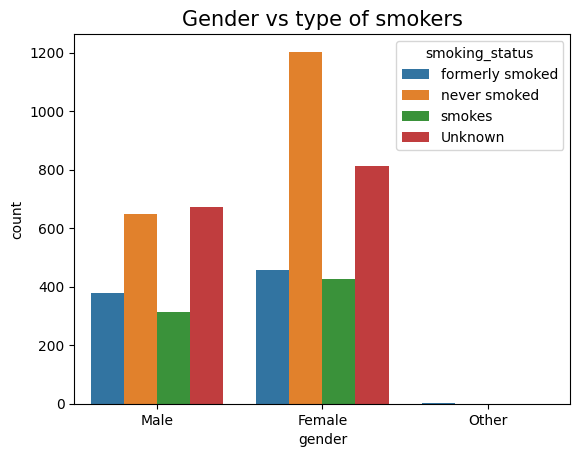

In [ ]:
sns.countplot(x=train['gender'],hue=train["smoking_status"])
plt.title("Gender vs type of smokers",fontsize=15)
plt.show()

In [ ]:
#Label Encoding
str_train=train.select_dtypes(include=['object'])
#str_test=test.select_dtypes(include=['object'])

In [ ]:
int_train=train.select_dtypes(include=['int','float'])
#int_test=test.select_dtypes(include=['int','float'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train_data=str_train.apply(label.fit_transform)
train_data=train_data.join(int_train)
train_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0,1
5,1,1,2,1,1,56669,81.0,0,0,186.21,29.0,1


In [ ]:
#test_data=str_test.apply(label.fit_transform)
#test_data=test_data.join(int_test)
#test_data.head()

In [ ]:
#Modelling and predicion
xtrain=train_data.drop(["stroke"],axis=1)
xtrain.shape

(4909, 11)

In [ ]:
ytrain=train_data['stroke']
ytrain.shape

(4909,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.2)

In [ ]:
print(x_test.shape)
print(x_train.shape)

(982, 11)
(3927, 11)


In [ ]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
5067,1,0,2,1,2,65814,21.0,0,0,138.51,24.3
3050,1,0,2,0,2,41618,61.0,0,0,140.07,29.5
3221,1,1,2,0,1,34778,65.0,0,0,223.90,28.2
2111,1,1,2,1,1,49254,57.0,1,0,80.72,41.5
3289,0,1,2,0,2,11313,44.0,0,0,86.15,21.3


In [ ]:
y_train.head()

5067    0
3050    0
3221    0
2111    0
3289    0
Name: stroke, dtype: int64

In [ ]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
1223,1,0,4,0,0,14049,8.00,0,0,115.54,28.5
1499,0,0,4,0,0,45357,1.24,0,0,113.96,21.5
73,1,1,2,0,2,50784,63.00,0,0,228.56,27.4
1371,1,0,4,1,0,50453,2.00,0,0,94.75,18.0
1431,0,1,0,0,2,32459,76.00,0,0,84.21,24.4


In [ ]:
y_test.head()


1223    0
1499    0
73      1
1371    0
1431    0
Name: stroke, dtype: int64

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predict=model.predict(x_test)
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
test_score=model.score(x_test,y_test)
print("Naive Bayes:",test_score)

Naive Bayes: 0.9205702647657841


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_model=DecisionTreeClassifier()
df_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Double CLick to edit
y_predict=df_model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dtscore=df_model.score(x_test,y_test)
print("Decision Tree",dtscore)

Decision Tree 0.9164969450101833


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=100)

In [ ]:
rf.fit(x_train,y_train)
y_pred_rfc=rf.predict(x_test)
rfscore=rf.score(x_test,y_test)
print("Random Forest",rfscore)

Random Forest 0.9480651731160896


In [ ]:
print('Score:', rf.score(x_test, y_test))

Score: 0.9480651731160896


In [ ]:
#LOGISITC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
lrmodel=lr.score(x_test,y_test)
print(lrmodel)

0.9490835030549898


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
Y_pred=knn.predict(x_test)

In [ ]:
knnmodel=knn.score(x_test,y_test)
print(knnmodel)

0.9490835030549898


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score

import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_val_score

# New Section

[0.95928753 0.95801527 0.96178344 0.95923567 0.95923567]
0.9595115152104505


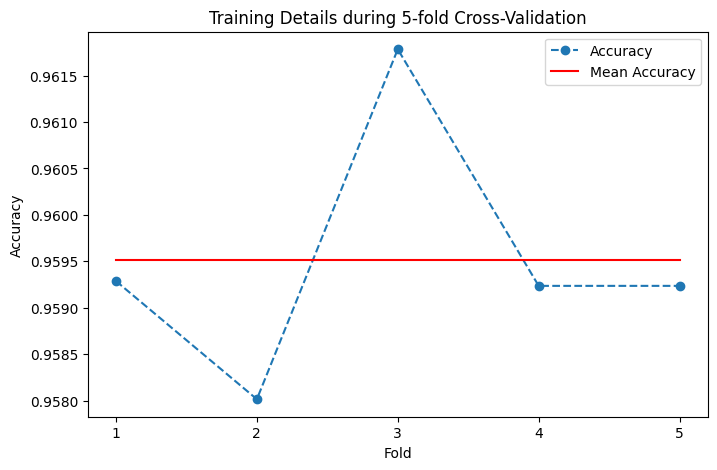

In [ ]:
model_score =cross_val_score(estimator=RandomForestClassifier(),X=x_train, y=y_train, cv=5)

mean_model_score = np.mean(model_score)



print(model_score)

print(model_score.mean())



# Plot training details

plt.figure(figsize=(8, 5))

plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')

plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')

plt.xticks(range(1, 6))

plt.xlabel('Fold')

plt.ylabel('Accuracy')

plt.title('Training Details during 5-fold Cross-Validation')

plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/

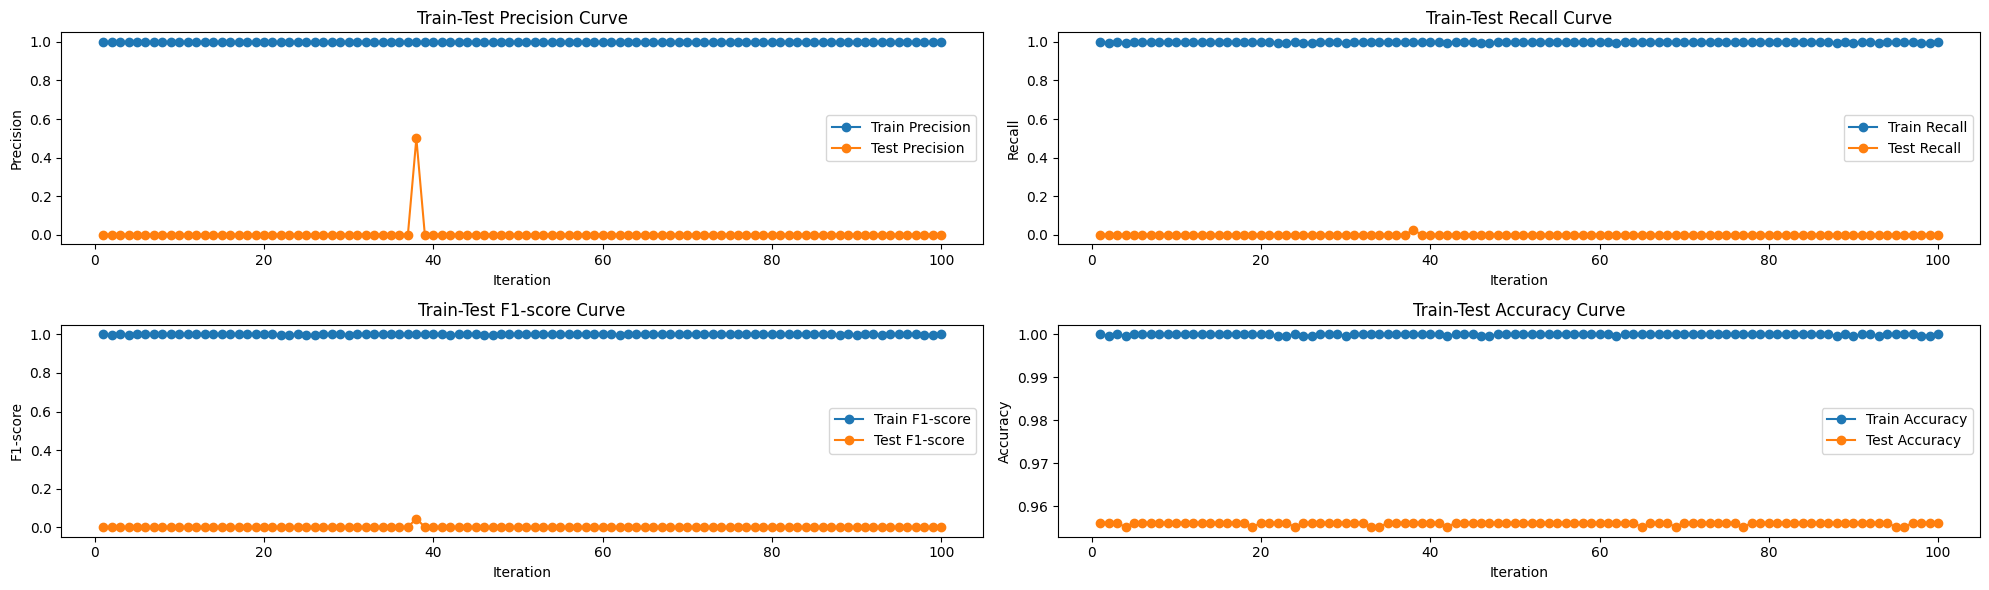

In [ ]:
# Initialize lists to store train and test scores for each iteration

train_precision, test_precision = [], []

train_recall, test_recall = [], []

train_f1, test_f1 = [], []

train_accuracy, test_accuracy = [], []



# Number of iterations for train-test splits

num_iterations = 100



for i in range(num_iterations):

    # Split the data into train and test sets

    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)



    # Step 3: Model training

    model_rf = RandomForestClassifier(n_estimators=100)

    model_rf.fit(x_train,y_train)





    # Step 4: Model evaluation on train and test sets

    y_train_pred = model_rf.predict(x_train)

    y_test_pred = model_rf.predict(x_test)



    # Calculate precision, recall, F1-score, and accuracy for train and test sets

    train_precision.append(precision_score(y_train, y_train_pred))

    test_precision.append(precision_score(y_test, y_test_pred))



    train_recall.append(recall_score(y_train, y_train_pred))

    test_recall.append(recall_score(y_test, y_test_pred))



    train_f1.append(f1_score(y_train, y_train_pred))

    test_f1.append(f1_score(y_test, y_test_pred))



    train_accuracy.append(accuracy_score(y_train, y_train_pred))

    test_accuracy.append(accuracy_score(y_test, y_test_pred))



# Step 5: Plot train-test curves

iterations = np.arange(1, num_iterations + 1)



plt.figure(figsize=(20, 6))



# Precision curve

plt.subplot(2, 2, 1)

plt.plot(iterations, train_precision, marker='o', label='Train Precision')

plt.plot(iterations, test_precision, marker='o', label='Test Precision')

plt.xlabel('Iteration')

plt.ylabel('Precision')

plt.title('Train-Test Precision Curve')

plt.legend()



# Recall curve

plt.subplot(2, 2, 2)

plt.plot(iterations, train_recall, marker='o', label='Train Recall')

plt.plot(iterations, test_recall, marker='o', label='Test Recall')

plt.xlabel('Iteration')

plt.ylabel('Recall')

plt.title('Train-Test Recall Curve')

plt.legend()



# F1-score curve

plt.subplot(2, 2, 3)

plt.plot(iterations, train_f1, marker='o', label='Train F1-score')

plt.plot(iterations, test_f1, marker='o', label='Test F1-score')

plt.xlabel('Iteration')

plt.ylabel('F1-score')

plt.title('Train-Test F1-score Curve')

plt.legend()



# Accuracy curve

plt.subplot(2, 2, 4)

plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')

plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')

plt.xlabel('Iteration')

plt.ylabel('Accuracy')

plt.title('Train-Test Accuracy Curve')

plt.legend()



plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

Accuracy: 0.9562118126272913
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



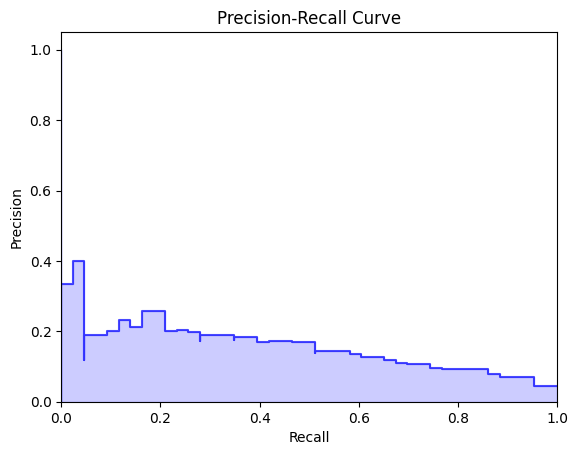

<ipython-input-53-da224b6a6793>:73: RuntimeWarning:

invalid value encountered in divide



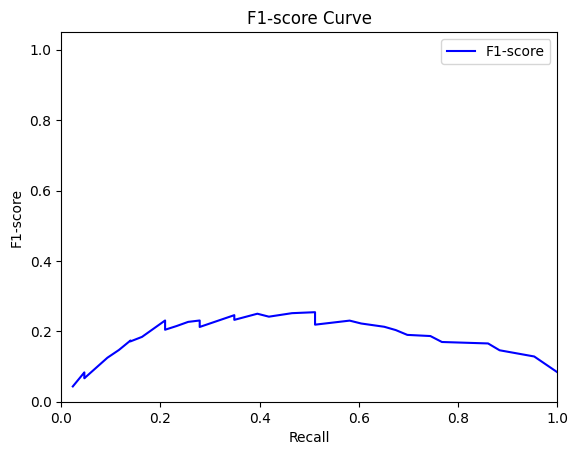

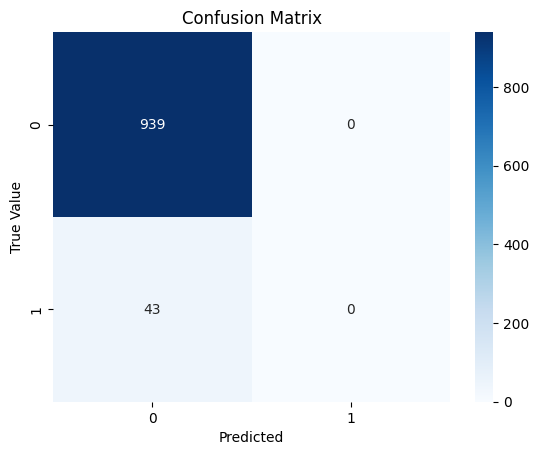

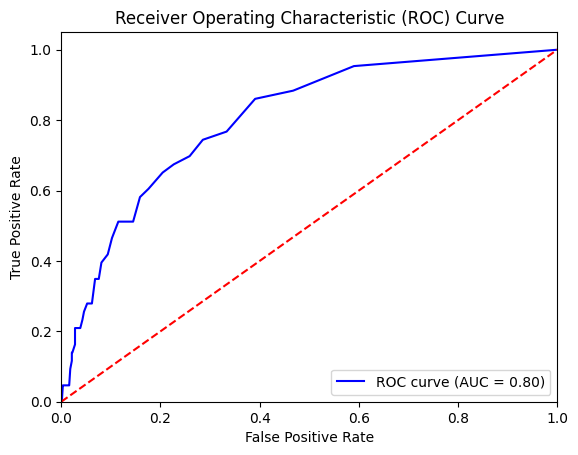

In [ ]:
# Model testing and evaluation

y_pred = model_rf.predict(x_test)



# Calculate accuracy, precision, recall, and F1-score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)



print("Accuracy:", accuracy)

print("Precision:", precision)

print("Recall:", recall)

print("F1-score:", f1)





# Generate and plot classification report

class_report = classification_report(y_test, y_pred)

print("Classification Report:")

print(class_report)







# Plot Precision-Recall curve

y_pred_probs = model_rf.predict_proba(x_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)



plt.step(recall, precision, color='b', alpha=0.7, where='post')

plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

plt.ylim([0.0, 1.05])

plt.xlim([0.0, 1.0])

plt.show()



# Plot F1-score curve

f1_values = 2 * (precision * recall) / (precision + recall)

plt.plot(recall, f1_values, color='b', label='F1-score')

plt.xlabel('Recall')

plt.ylabel('F1-score')

plt.title('F1-score Curve')

plt.ylim([0.0, 1.05])

plt.xlim([0.0, 1.0])

plt.legend()

plt.show()





# Calculate confusion matrix

y_pred = model_rf.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

cm



# Create a heatmap for the confusion matrix

from matplotlib import pyplot as plt

import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('True Value')

plt.title('Confusion Matrix')

plt.show()







# Calculate ROC curve and AUC

y_pred_probs = model_rf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

roc_auc = auc(fpr, tpr)



# Plot ROC curve

plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='r', linestyle='--')

plt.xlim([0, 1])

plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.show()


Accuracy: 0.955193482688391
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



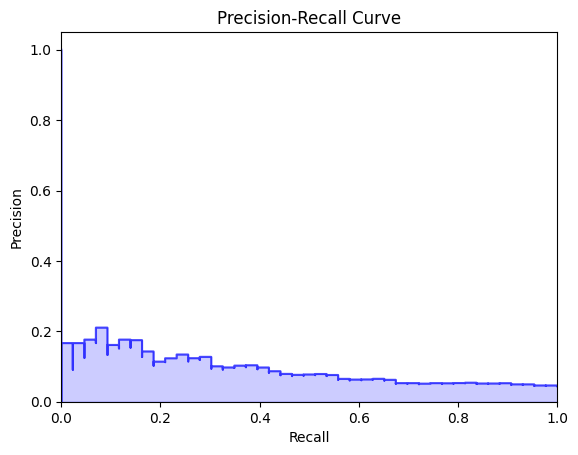

<ipython-input-54-b217541dc667>:73: RuntimeWarning:

invalid value encountered in divide



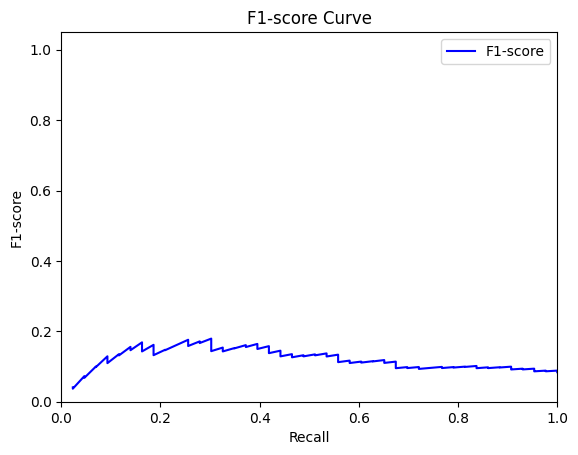

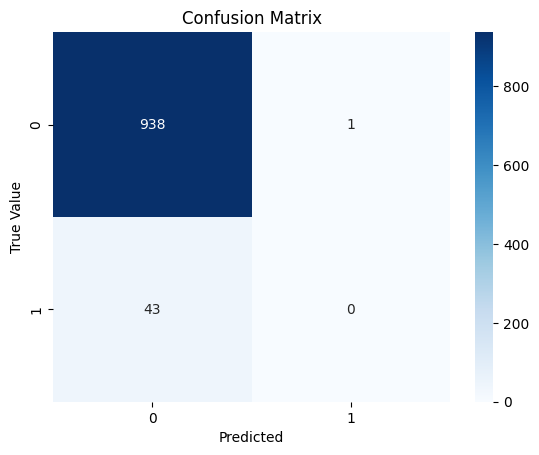

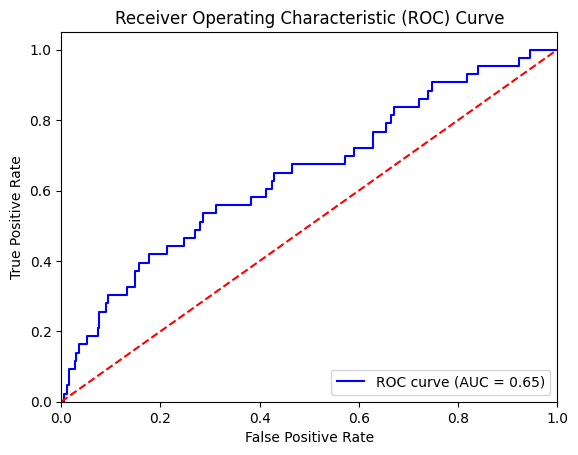

In [ ]:
# Model testing and evaluation

y_pred = lr.predict(x_test)



# Calculate accuracy, precision, recall, and F1-score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)



print("Accuracy:", accuracy)

print("Precision:", precision)

print("Recall:", recall)

print("F1-score:", f1)





# Generate and plot classification report

class_report = classification_report(y_test, y_pred)

print("Classification Report:")

print(class_report)







# Plot Precision-Recall curve

y_pred_probs = lr.predict_proba(x_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)



plt.step(recall, precision, color='b', alpha=0.7, where='post')

plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')

plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

plt.ylim([0.0, 1.05])

plt.xlim([0.0, 1.0])

plt.show()



# Plot F1-score curve

f1_values = 2 * (precision * recall) / (precision + recall)

plt.plot(recall, f1_values, color='b', label='F1-score')

plt.xlabel('Recall')

plt.ylabel('F1-score')

plt.title('F1-score Curve')

plt.ylim([0.0, 1.05])

plt.xlim([0.0, 1.0])

plt.legend()

plt.show()





# Calculate confusion matrix

y_pred = lr.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)





# Create a heatmap for the confusion matrix

from matplotlib import pyplot as plt

import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('True Value')

plt.title('Confusion Matrix')

plt.show()







# Calculate ROC curve and AUC

y_pred_probs = lr.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

roc_auc = auc(fpr, tpr)



# Plot ROC curve

plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='r', linestyle='--')

plt.xlim([0, 1])

plt.ylim([0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc="lower right")

plt.show()


[0.91475827 0.91857506 0.93248408 0.91974522 0.93503185]
0.9241188959660299


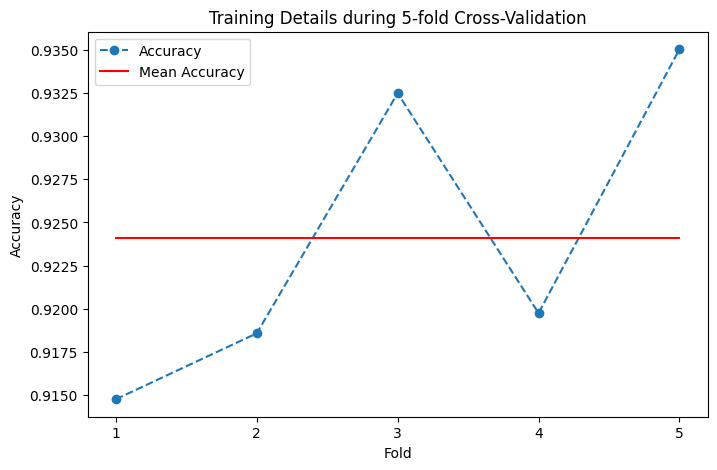

In [ ]:
#Gaussian Naive Bayes

estimator = GaussianNB()

# Perform 5-fold cross-validation

model_score = cross_val_score(estimator=estimator, X=x_train, y=y_train, cv=5)

# Calculate mean accuracy score

mean_model_score = np.mean(model_score)

# Print accuracy scores for each fold

print(model_score)

# Print mean accuracy

print(model_score.mean())

# Plot training details

plt.figure(figsize=(8, 5))

plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')

plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')

plt.legend()
plt.show()


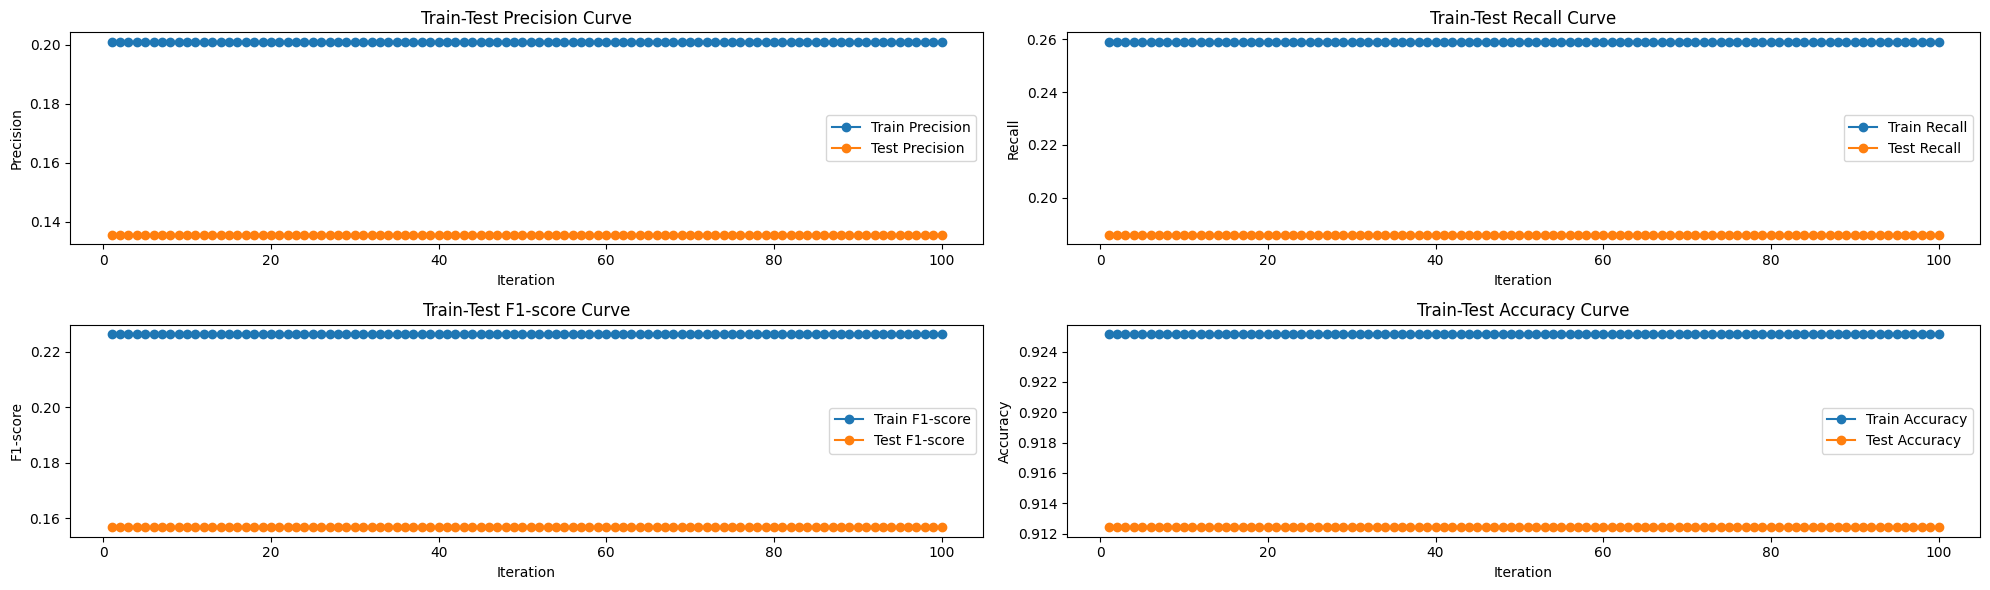

In [ ]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

    # Step 3: Model training
    model_nb = GaussianNB()
    model_nb.fit(x_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = model_nb.predict(x_train)
    y_test_pred = model_nb.predict(x_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy: 0.9124236252545825
Precision: 0.13559322033898305
Recall: 0.18604651162790697
F1-score: 0.1568627450980392
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       939
           1       0.14      0.19      0.16        43

    accuracy                           0.91       982
   macro avg       0.55      0.57      0.56       982
weighted avg       0.93      0.91      0.92       982



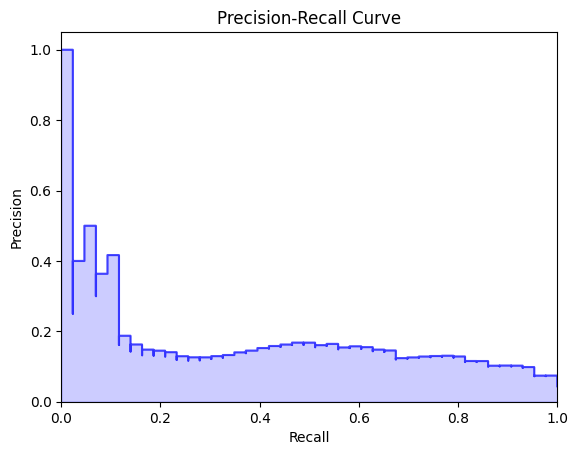

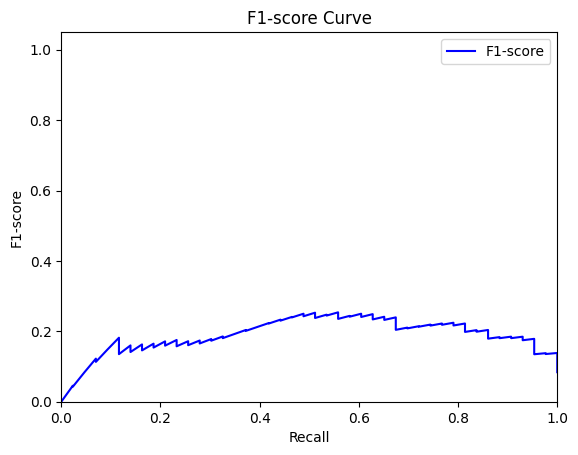

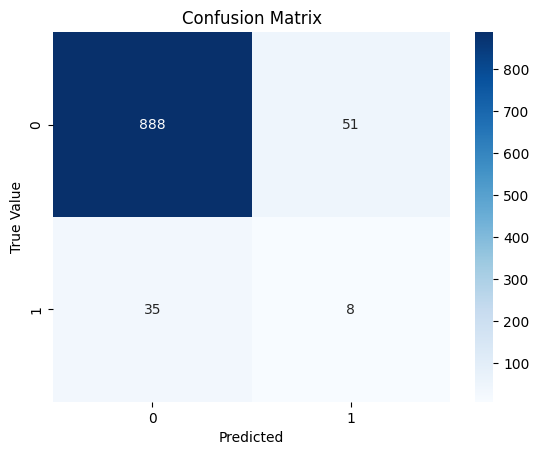

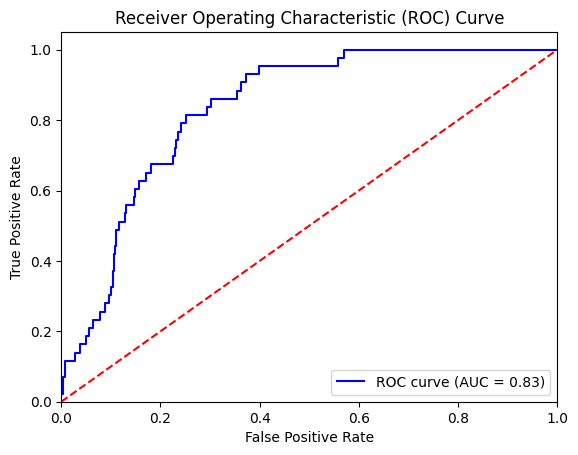

In [ ]:
# Create an instance of the Gaussian Naive Bayes estimator
model_nb = GaussianNB()

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

# Train the Gaussian Naive Bayes model
model_nb.fit(x_train, y_train)

# Model testing and evaluation
y_pred = model_nb.predict(x_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = model_nb.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9124236252545825
Precision: 0.13559322033898305
Recall: 0.18604651162790697
F1-score: 0.1568627450980392
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       939
           1       0.14      0.19      0.16        43

    accuracy                           0.91       982
   macro avg       0.55      0.57      0.56       982
weighted avg       0.93      0.91      0.92       982



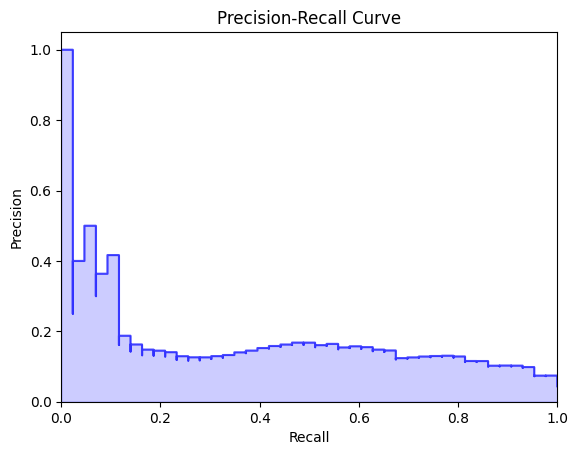

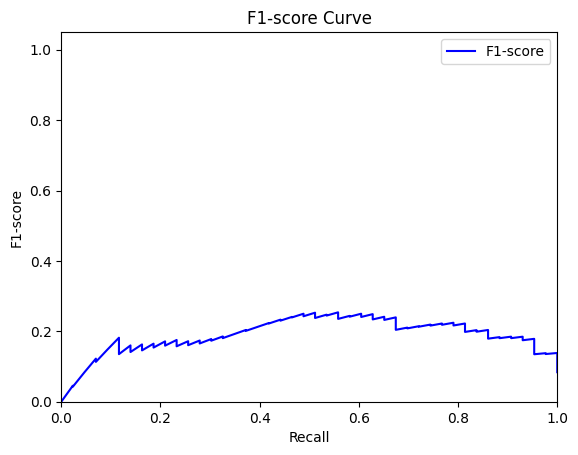

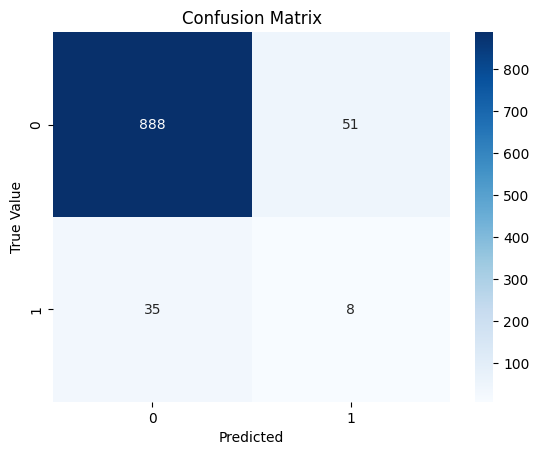

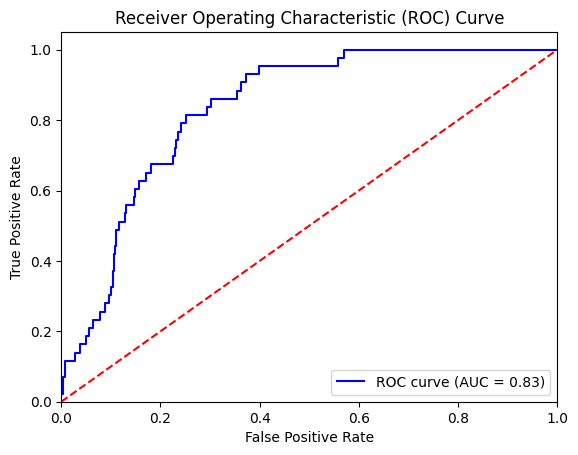

In [ ]:
# Create an instance of the Gaussian Naive Bayes estimator
model_nb = GaussianNB()

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

# Train the Gaussian Naive Bayes model
model_nb.fit(x_train, y_train)

# Model testing and evaluation
y_pred = model_nb.predict(x_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = model_nb.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

[0.95801527 0.95547074 0.95796178 0.95796178 0.95796178]
0.9574742710815058


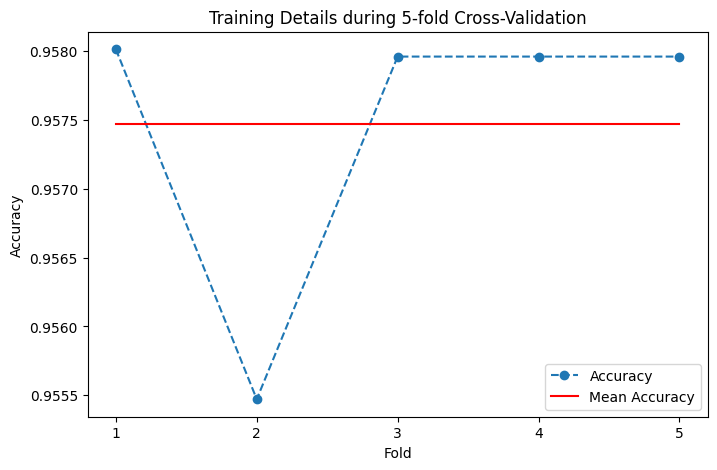

In [ ]:
# Perform 5-fold cross-validation on a Logistic Regression estimator
model_score = cross_val_score(estimator=LogisticRegression(), X=x_train, y=y_train, cv=5)

# Calculate the mean accuracy score
mean_model_score = np.mean(model_score)

# Print the accuracy scores and their mean
print(model_score)
print(model_score.mean())

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


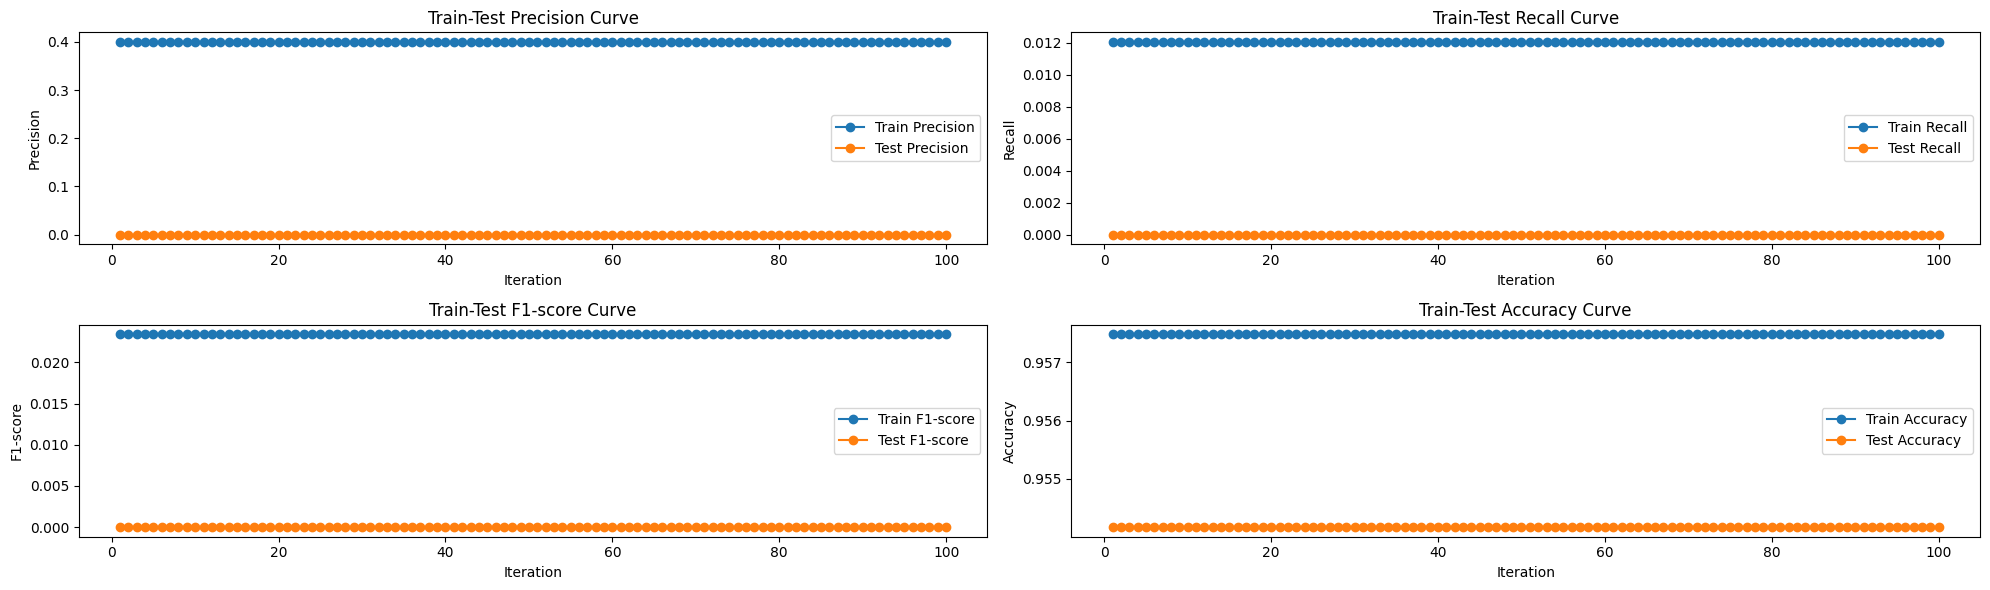

In [ ]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

    # Step 3: Model training
    model_lr = LogisticRegression()

    model_lr.fit(x_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = model_lr.predict(x_train)
    y_test_pred = model_lr.predict(x_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.9541751527494908
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



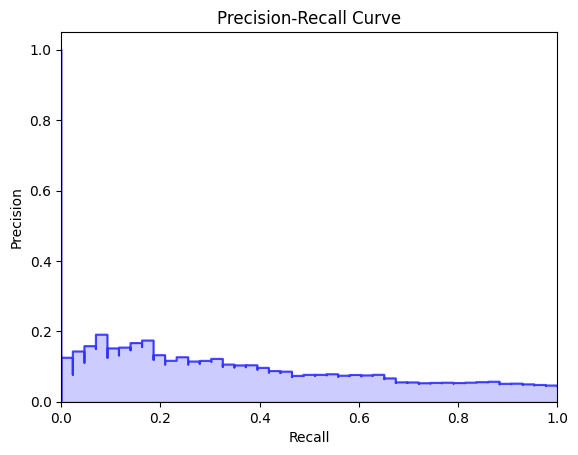

<ipython-input-61-b8f5013c47f7>:38: RuntimeWarning:

invalid value encountered in divide



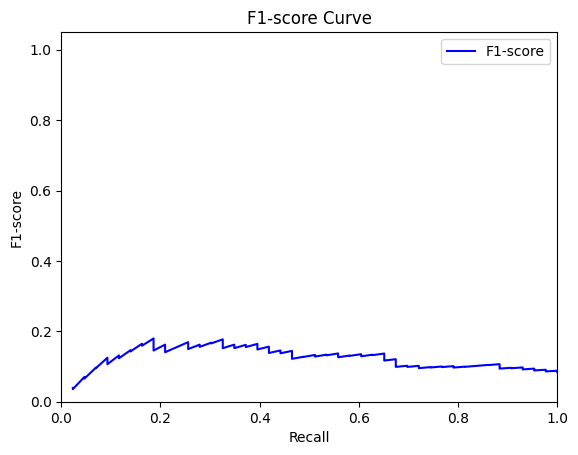

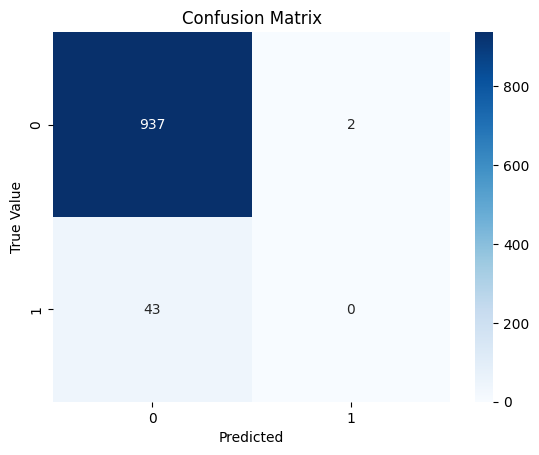

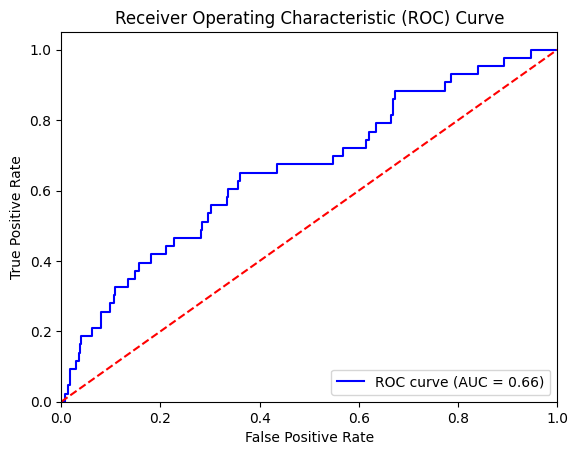

In [ ]:
# Model training
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

# Model testing and evaluation
y_pred = model_lr.predict(x_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = model_lr.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = model_lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.955193482688391
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



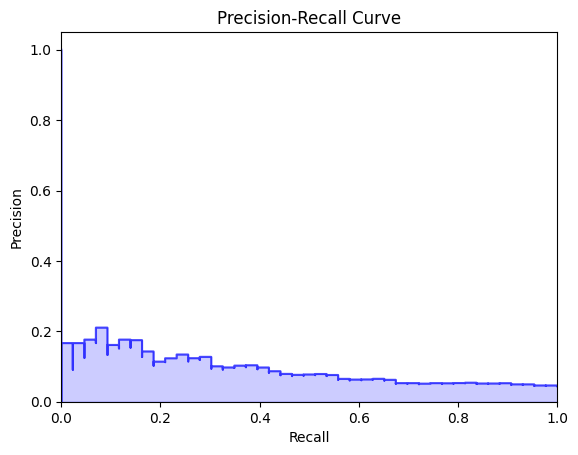

<ipython-input-62-e489a973daa3>:34: RuntimeWarning:

invalid value encountered in divide



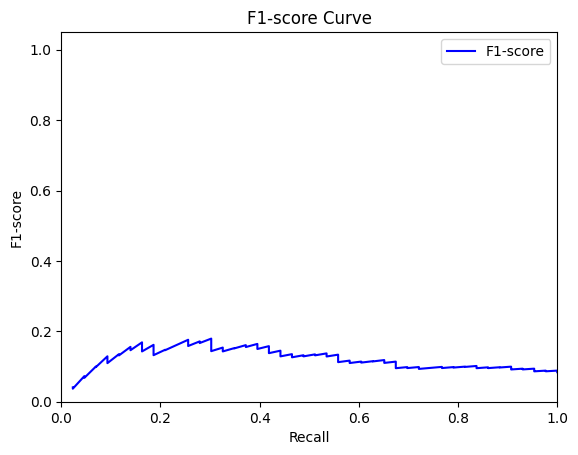

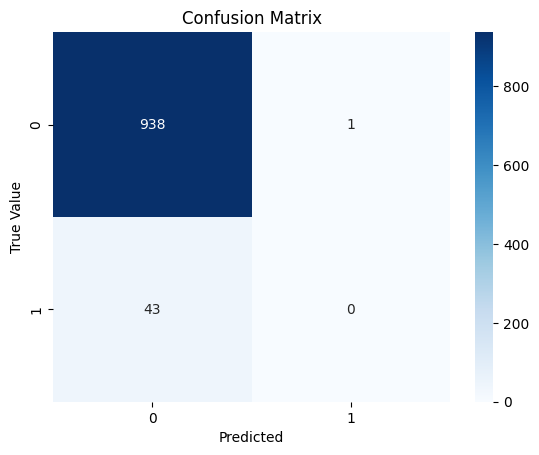

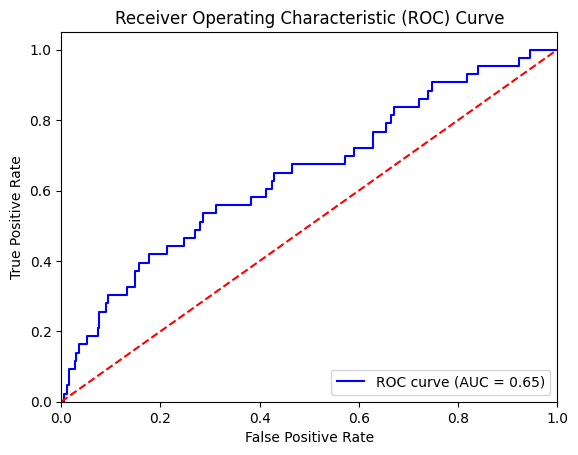

In [ ]:
# Model testing and evaluation
y_pred = lr.predict(x_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = lr.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


[0.91857506 0.9173028  0.92229299 0.92229299 0.91464968]
0.9190227062770457


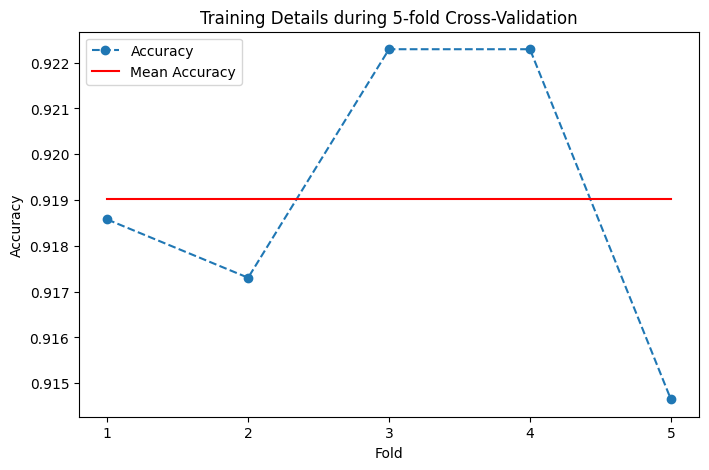

In [ ]:
#decision Tree
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Perform 5-fold cross-validation
model_score = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=5)

mean_model_score = np.mean(model_score)

print(model_score)
print(model_score.mean())

# Plot training details
plt.figure(figsize=(8, 5))

plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')

plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')

plt.legend()
plt.show()


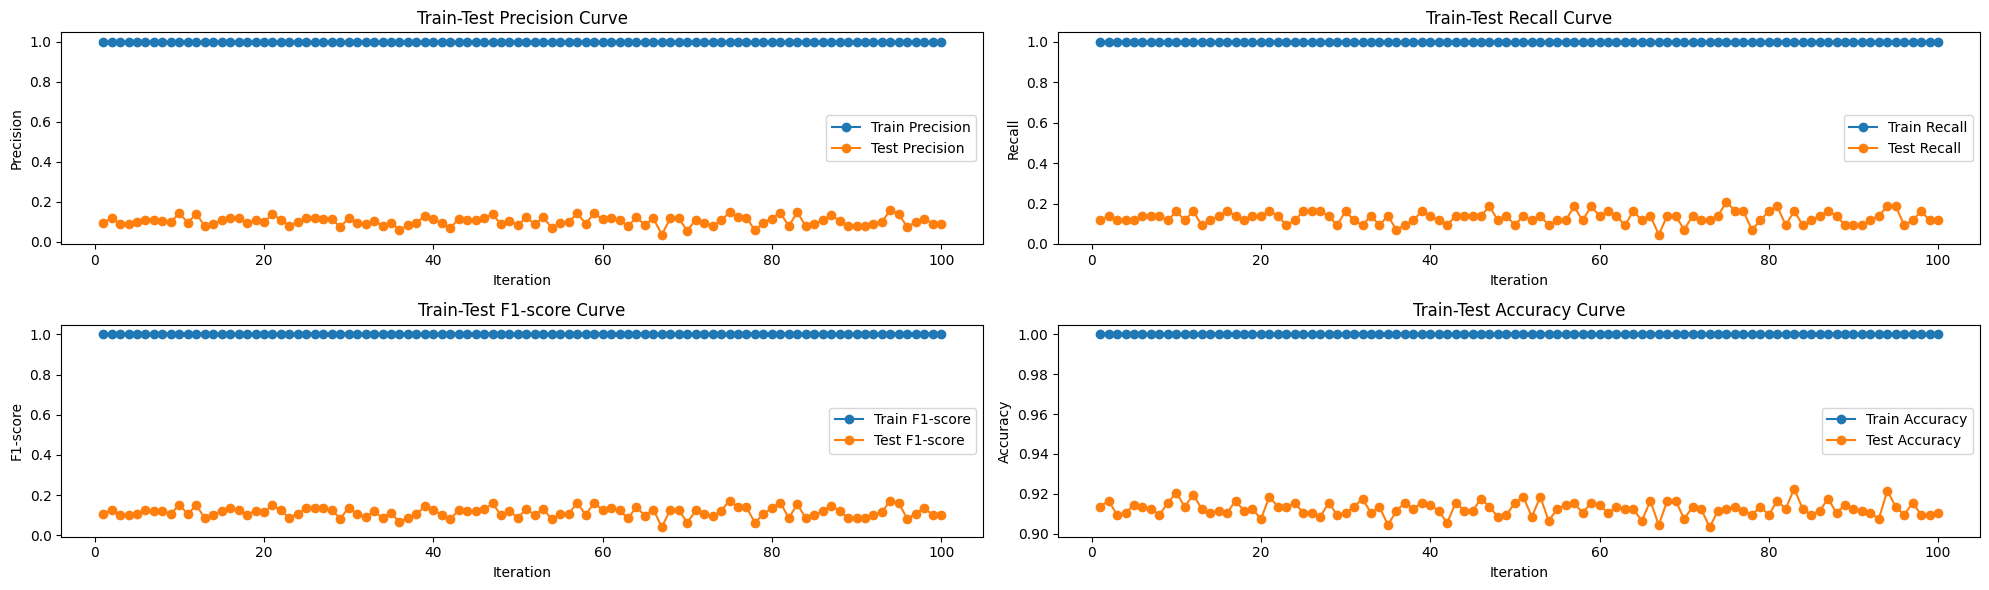

In [ ]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

    # Step 3: Model training
    model_dt = DecisionTreeClassifier()

    model_dt.fit(x_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = model_dt.predict(x_train)
    y_test_pred = model_dt.predict(x_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy: 0.9164969450101833
Precision: 0.14545454545454545
Recall: 0.18604651162790697
F1-score: 0.16326530612244897
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       939
           1       0.15      0.19      0.16        43

    accuracy                           0.92       982
   macro avg       0.55      0.57      0.56       982
weighted avg       0.93      0.92      0.92       982



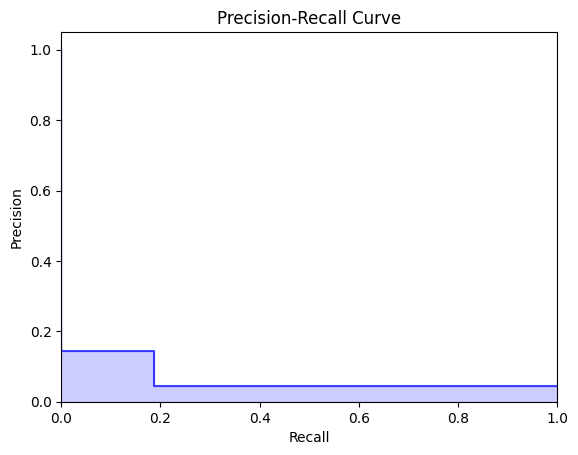

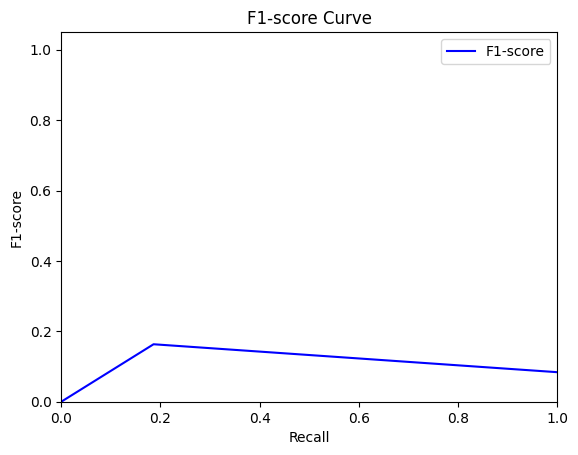

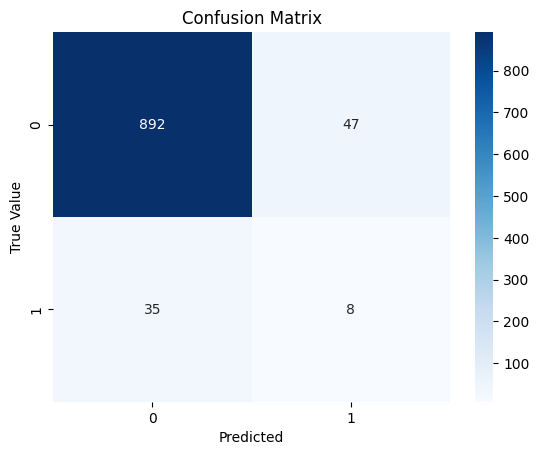

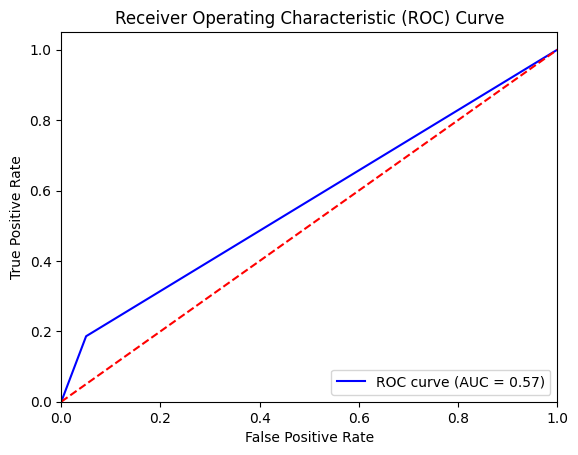

In [ ]:
# Initialize and train a DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

# Model testing and evaluation
y_pred = model_dt.predict(x_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Precision-Recall Curve
y_pred_probs = model_dt.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# F1-score Curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


***************KNN********************

Individual fold scores: [0.95801527 0.956743   0.95796178 0.95796178 0.95796178]
Mean score: 0.9577287240077146


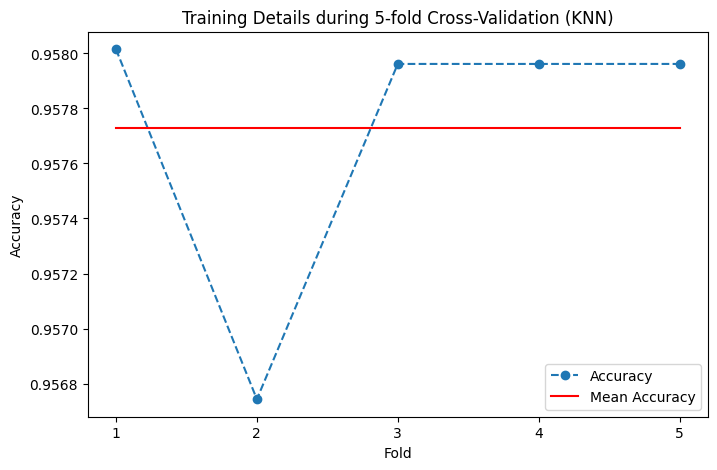

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
model_score = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=5)

# Calculate mean cross-validation score
mean_model_score = np.mean(model_score)

# Print individual cross-validation scores and mean score
print("Individual fold scores:", model_score)
print("Mean score:", mean_model_score)

# Plot training details
plt.figure(figsize=(8, 5))

plt.plot(range(1, 6), model_score, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_model_score] * 5, color='r', linestyle='-', label='Mean Accuracy')

plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation (KNN)')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/

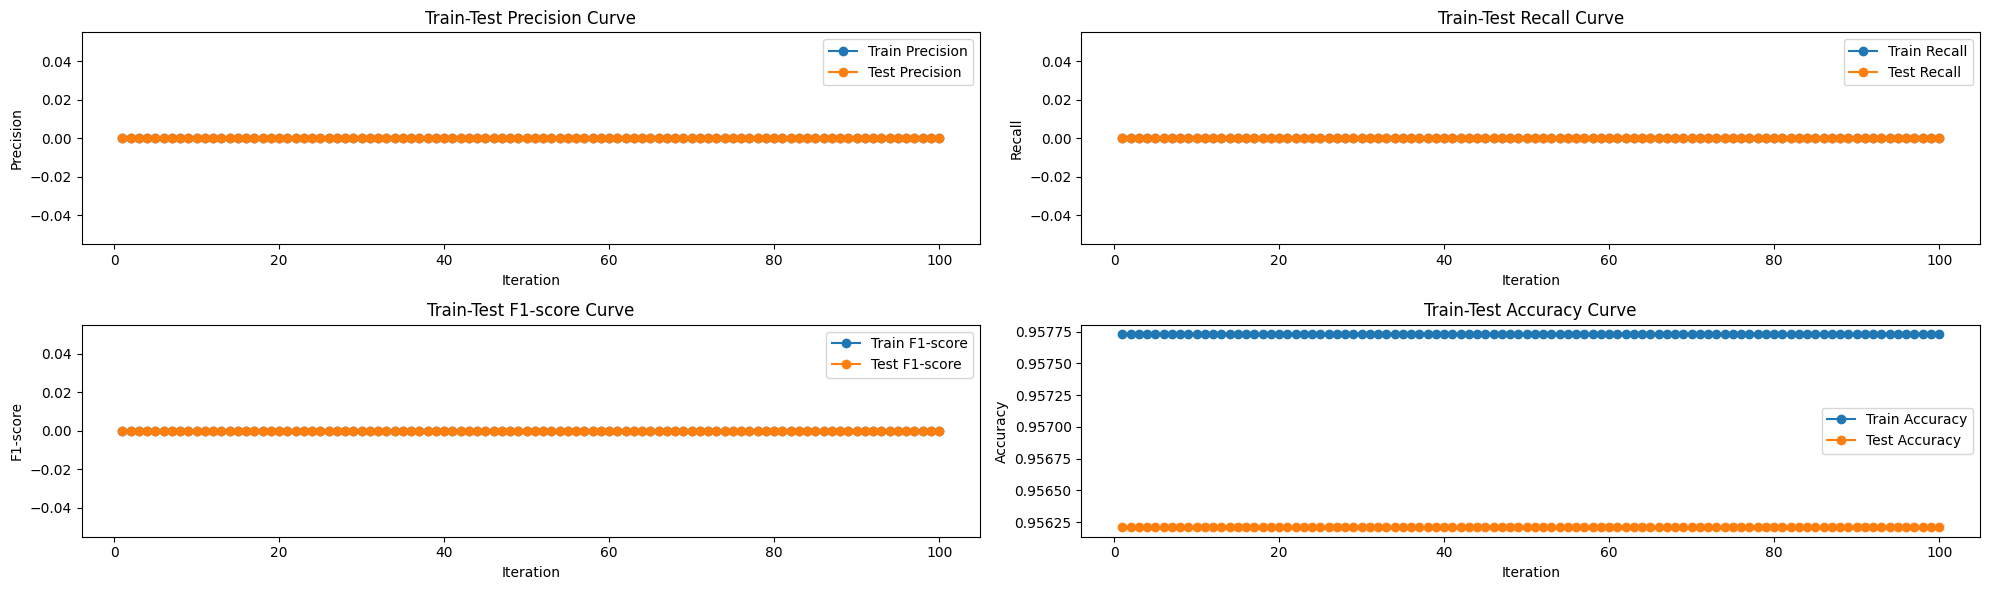

In [ ]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

    # Step 3: Model training
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(x_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = model_knn.predict(x_train)
    y_test_pred = model_knn.predict(x_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

Accuracy: 0.9562118126272913
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



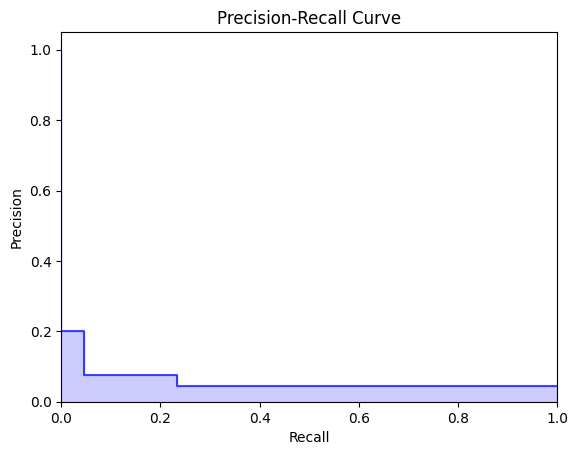

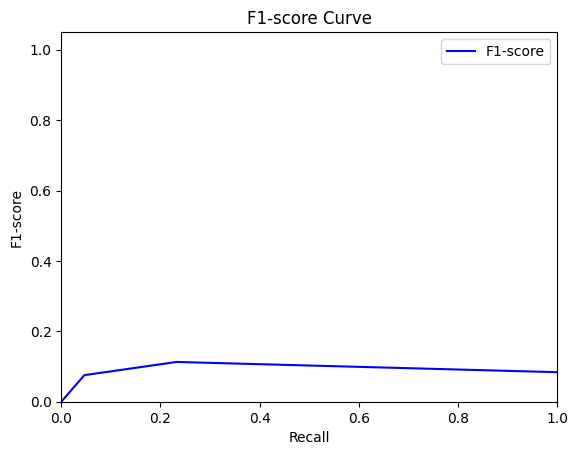

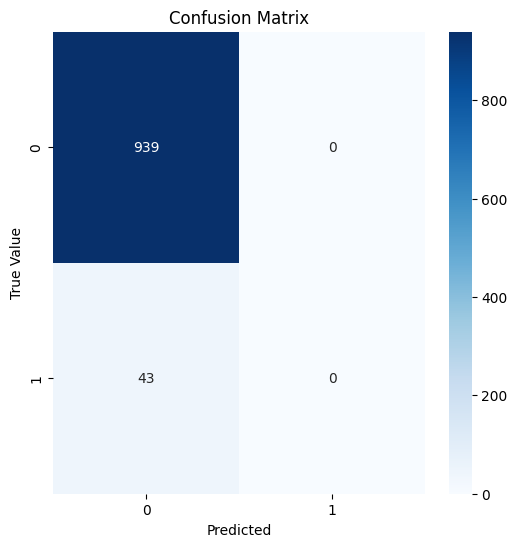

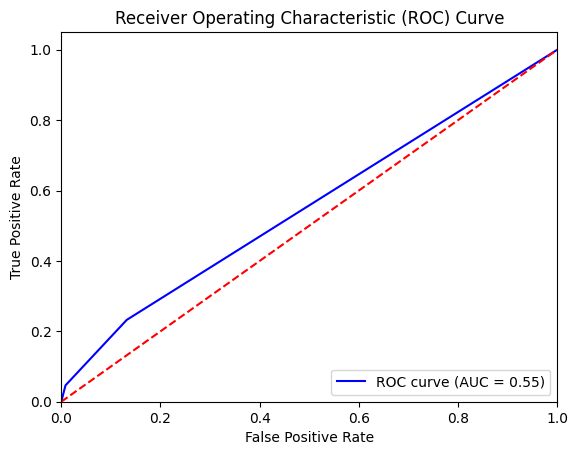

In [ ]:
# Step 1: Split data, train KNN model, and evaluate

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=0)

# Step 2: Model training

# Initialize and train a KNeighborsClassifier model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

# Step 3: Model testing and evaluation

# Predict on the test set
y_pred = model_knn.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Step 4: Plot Precision-Recall Curve

# Get predicted probabilities for positive class
y_pred_probs = model_knn.predict_proba(x_test)[:, 1]

# Calculate precision, recall, and thresholds for precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

# Plot Precision-Recall curve
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Step 5: Plot F1-score Curve

# Calculate F1-score values for different thresholds
f1_values = 2 * (precision * recall) / (precision + recall)

# Plot F1-score curve
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Step 6: Calculate Confusion Matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
import seaborn as sn
plt.figure(figsize=(6, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Calculate ROC Curve and AUC

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
